In [2]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
bempp.api.set_default_device(0, 0)
#bempp.api.enable_console_logging()

Compute the ratio $\frac{Z}{R}$, where $Z$ is the surface-surface distance between two spheres, and $R = 1$. 

In [3]:
NZ = 15
lower_bd = 0.5  # lower bound of Z
upper_bd = 4.0  # upper bound of Z
surf_dist = np.linspace(lower_bd, upper_bd, NZ)

Nk = 15
lbound = .05    # lower bound of k in ik
ubound = 4      # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), Nk)

h = .2   # size of the mesh (element)

In [4]:
# Two unit spheres' case
result_k_sphere_sphere = np.empty(Nk, dtype='float64')
Casimir_energy_sphere_sphere = np.empty(NZ, dtype='float64')
for index1, point1 in enumerate(surf_dist):
    
    center1 = ((point1/2) + 1, 0, 0)
    center2 = (-((point1/2) + 1), 0, 0)

    sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)
    
    for index2, point2 in enumerate(quad_points):
    
        wavenumber = -1j * np.log(point2)

        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_k_sphere_sphere[index2] = logdet
        
    Casimir_energy_sphere_sphere[index1] = np.trapz(-result_k_sphere_sphere / quad_points, quad_points) / (2 * np.pi)
    print(f"Log Determinant: {index1}: {Casimir_energy_sphere_sphere[index1]}")

Log Determinant: 0: 0.028221717339497382
Log Determinant: 1: 0.00871642132314405
Log Determinant: 2: 0.0034527447374853026
Log Determinant: 3: 0.001587812867319775
Log Determinant: 4: 0.0008073195007668241
Log Determinant: 5: 0.00044217920875382435
Log Determinant: 6: 0.000256455693168467
Log Determinant: 7: 0.00015574346142413332
Log Determinant: 8: 9.819243039319648e-05
Log Determinant: 9: 6.390251899114196e-05
Log Determinant: 10: 4.272758015796292e-05
Log Determinant: 11: 2.9252658845743262e-05
Log Determinant: 12: 2.044654147072235e-05
Log Determinant: 13: 1.4552680518201271e-05
Log Determinant: 14: 1.052967550203955e-05


In [5]:
# Two length-2 cubes' case
Casimir_energy_cube_cube = np.empty(NZ, dtype='float64')
result_k_cube_cube = np.empty(Nk, dtype='float64')
length_cube = 2

for index1, point1 in enumerate(surf_dist):
    
    center1 = ((point1/2) + 1, 0, 0)
    center2 = (-((point1/2) + 1), 0, 0)

    cube1 = bempp.api.shapes.cube(length = length_cube, h=h, origin=(point1/2,-1,-1))
    cube2 = bempp.api.shapes.cube(length = length_cube, h=h, origin=(-((point1/2) + 2),-1,-1))
    
    rwg1 = bempp.api.function_space(cube1, "RWG", 0)
    rwg2 = bempp.api.function_space(cube2, "RWG", 0)

    snc1 = bempp.api.function_space(cube1, "SNC", 0)
    snc2 = bempp.api.function_space(cube2, "SNC", 0)
    
    for index2, point2 in enumerate(quad_points):
    
        wavenumber = -1j * np.log(point2)

        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_k_cube_cube[index2] = logdet
        
    Casimir_energy_cube_cube[index1] = np.trapz(-result_k_cube_cube / quad_points, quad_points) / (2 * np.pi)
    print(f"Log Determinant: {index1}: {Casimir_energy_cube_cube[index1]}")

Log Determinant: 0: 0.31191440621883293
Log Determinant: 1: 0.08098655992107945
Log Determinant: 2: 0.028862533371736984
Log Determinant: 3: 0.01233898014951829
Log Determinant: 4: 0.005942183644217376
Log Determinant: 5: 0.0031160265055188248
Log Determinant: 6: 0.0017437390725460779
Log Determinant: 7: 0.001027505888256232
Log Determinant: 8: 0.0006315034415315203
Log Determinant: 9: 0.00040215425015841866
Log Determinant: 10: 0.0002638943881288895
Log Determinant: 11: 0.00017774782909101613
Log Determinant: 12: 0.00012247446503355427
Log Determinant: 13: 8.609993782116883e-05
Log Determinant: 14: 6.161862449872039e-05


In [6]:
# One unit sphere and one length-2 cube case
Casimir_energy_sphere_cube = np.empty(NZ, dtype='float64')
result_k_sphere_cube = np.empty(Nk, dtype='float64')
length_cube = 2

for index1, point1 in enumerate(surf_dist):
    
    center1 = ((point1/2) + 1, 0, 0)
    center2 = (-((point1/2) + 1), 0, 0)

    cube1 = bempp.api.shapes.cube(length = length_cube, h=h, origin=(point1/2,-1,-1))
    sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)
    
    rwg1 = bempp.api.function_space(cube1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(cube1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)
    
    for index2, point2 in enumerate(quad_points):
    
        wavenumber = -1j * np.log(point2)

        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_k_sphere_cube[index2] = logdet
        
    Casimir_energy_sphere_cube[index1] = np.trapz(-result_k_sphere_cube / quad_points, quad_points) / (2 * np.pi)
    print(f"Log Determinant: {index1}: {Casimir_energy_sphere_cube[index1]}")

Log Determinant: 0: 0.07442001326649997
Log Determinant: 1: 0.023148579414002876
Log Determinant: 2: 0.009125364444603304
Log Determinant: 3: 0.004156384227614213
Log Determinant: 4: 0.002090171074795811
Log Determinant: 5: 0.00113219152890534
Log Determinant: 6: 0.0006498276035932972
Log Determinant: 7: 0.0003908385810466827
Log Determinant: 8: 0.00024429560654615776
Log Determinant: 9: 0.0001577722765851639
Log Determinant: 10: 0.00010477988288853525
Log Determinant: 11: 7.129808085458882e-05
Log Determinant: 12: 4.956001245314013e-05
Log Determinant: 13: 3.5104946516727004e-05
Log Determinant: 14: 2.5290266516292264e-05


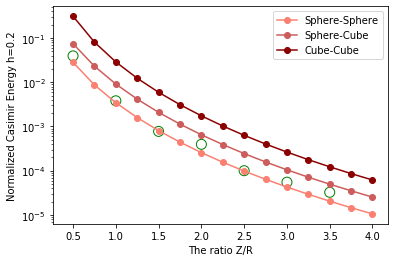

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

ref_x = [0.5,1,1.5,2,2.5,3,3.5]
ref_y = [0.03953125, 0.0038125, 0.000775 , 0.0003953125, 0.0001, 0.000055,0.0000325]
plt.semilogy(surf_dist, Casimir_energy_sphere_sphere, color = 'salmon', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, Casimir_energy_sphere_cube, color = 'indianred', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, Casimir_energy_cube_cube, color = 'darkred', linestyle = '-', marker = 'o')
plt.scatter(ref_x, ref_y, s=100, facecolors='none', edgecolors='g')

plt.ylabel('Normalized Casimir Energy h=0.2')
plt.legend(['Sphere-Sphere','Sphere-Cube','Cube-Cube'])
plt.xlabel('The ratio Z/R')
plt.savefig('Casimir energy in three cases.pdf')

In [18]:
Casimir_energy_sphere_sphere[11]

2.9252658845743262e-05

In [15]:
np.linspace(0.5,4,15)

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  ])